In [1]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
# library

import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# import Dataset

file_path = '/content/drive/MyDrive/Side Project/Side_Project/Beer Data Analysis/datasets/datasets/BeerDataScienceProject.tar.bz2'
df = pd.read_csv(file_path, compression = "bz2")
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206



### 1.Rank the top 3 breweries which produce the strongest beers

In [60]:
def top_n_breweries_by_ABS(n:int):
    breweries_and_ABV = df[['beer_ABV', 'beer_beerId', 'beer_brewerId']].groupby('beer_brewerId')['beer_ABV'].mean().sort_values(ascending = False).reset_index()
    breweries_and_ABV['rank'] = breweries_and_ABV['beer_ABV'].rank(method = 'dense', ascending = False)
    result = breweries_and_ABV[breweries_and_ABV['rank'] <= n]
    return result

In [61]:
top_n_breweries_by_ABS(3)

,beer_brewerId,beer_ABV,rank
0,6513,19.228824,1.0
1,736,13.750000,2.0
2,24215,12.466667,3.0


### 2. Which year did beers enjoy the highest ratings?

In [65]:
def convert_int_to_date(df:pd.DataFrame, col:str):
    datetime = pd.to_datetime(df[col], unit = 's')
    res = datetime.dt.year
    return res

In [67]:
df['year'] = convert_int_to_date(df,'review_time')
df['year'].head()

0    2009
1    2009
2    2009
3    2009
4    2010
Name: year, dtype: int64

In [69]:
df['ratings'] = df['review_appearance'] + df['review_palette'] + df['review_overall'] + df['review_taste'] + df['review_aroma']
df.groupby('year')['ratings'].sum().sort_values(ascending = False).head(1)

year
2011    2119537.0
Name: ratings, dtype: float64

In [95]:
year_overall_review = df[['year', 'review_overall']]
total_num_of_reviews = year_overall_review.groupby('year').count().reset_index().rename(columns = {'review_overall':'total_num_of_reviews'})
mean_review_overall = year_overall_review.groupby('year')['review_overall'].mean().reset_index().rename(columns = {'review_overall':'mean_review_overall'})
res = pd.merge(total_num_of_reviews, mean_review_overall, how = 'inner')
res

,year,total_num_of_reviews,mean_review_overall
0,1998,23,3.891304
1,1999,25,4.000000
2,2000,33,4.181818
3,2001,602,3.927741
4,2002,7581,3.798905
5,2003,18187,3.752900
6,2004,22905,3.794630
7,2005,29433,3.832042
8,2006,43083,3.798192
9,2007,46514,3.809552


Text(0, 0.5, 'mean_review_overall')

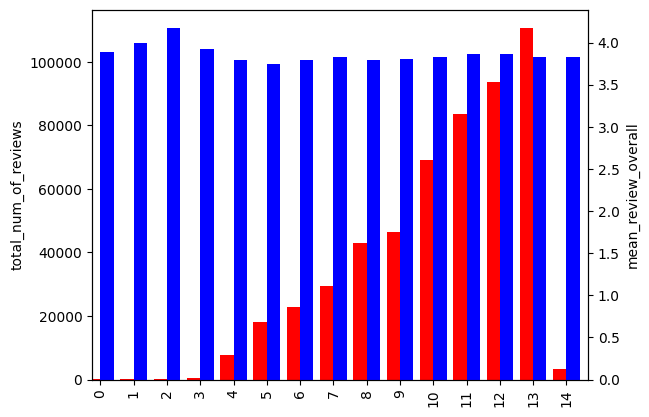

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

res.total_num_of_reviews.plot(kind = 'bar', color = 'red', ax = ax, width = width, position = 1)
res.mean_review_overall.plot(kind = 'bar', color = 'blue', ax = ax2, width = width, position = 0)

ax.set_ylabel('total_num_of_reviews')
ax2.set_ylabel('mean_review_overall')